In [ ]:
from collections import defaultdict
import math

def singlesSet(fileName, chunkSize):
    singlesList = defaultdict(int)
    baskets = []
    counterLine = 0
    with open(fileName) as file:
        for line in file:
            baskets.append(line.split())
            for num in line.split():
                singlesList[num] += 1
            counterLine += 1
            if counterLine == chunkSize:
                break
    return singlesList, baskets

def aprioriFunction(fileName, minSupp, chunkPercent = 1):
    totalLine = math.floor(sum([1 for i in open(fileName,"r").readlines() if i.strip()])*chunkPercent)
    singlesList, baskets = singlesSet(fileName, totalLine)
    
    #Check for higher threshold for singles
    frequentSingles = defaultdict(int)
    for key, value in singlesList.items():
        if (value/totalLine >= minSupp):
            frequentSingles[key] = value
            
    pairList = defaultdict(int)
    for line in baskets:
        for num in line:
            if num in frequentSingles:
                for num2 in line[line.index(num)+1:]:
                    if num2 in frequentSingles:
                        pairList[num, num2] += 1
                        
    #Check for higher threshold for pairs
    frequentPairs = defaultdict(int)
    for key, value in pairList.items():
        if (value/totalLine >= minSupp):
            frequentPairs[key] = value
    print(sum(frequentPairs.values()))

    for key, value in sorted(frequentPairs.items(), key=lambda x: x[1], reverse=True): 
        print ("%s : % d"%(key, value)) 
    return frequentPairs
    
import time
start_time = time.time()
aprioriFunction('retail.dat', 0.1)
print("--- %s seconds ---" % (time.time() - start_time))

('39', '48') :  29142
('39', '41') :  11414
('38', '39') :  10345
('41', '48') :  9018
--- 0.5317103862762451 seconds ---


In [ ]:
import time
start_time = time.time()
aprioriFunction('netflix.data', 0.1)
print("--- %s seconds ---" % (time.time() - start_time))

--- 2858.3481681346893 seconds ---


In [ ]:
import time
start_time = time.time()
aprioriFunction('netflix.data', 0.01)
print("--- %s seconds ---" % (time.time() - start_time))

--- 28832.640699148178 seconds ---


In [ ]:
from collections import defaultdict

def aprioriFunction(fileName, minSupp):
    f = open(fileName, "r")
    singlesList = defaultdict(int)
    totalLine = 0
    for line in f:
        for num in line.split():
            singlesList[num] += 1
        totalLine +=1

    #Check for higher threshold 
    frequentSingles = defaultdict(int)
    for key, value in singlesList.items():
        if (value/totalLine >= minSupp):
            frequentSingles[key] = value
            
    pairList = defaultdict(int)
    f.seek(0)#restart reader
    for line in f:
        numList = line.split()
        for num in numList:
            if num in frequentSingles:
                for num2 in numList[numList.index(num)+1:]:
                    if num2 in frequentSingles:
                        pairList[num, num2] += 1
                        
    #Check for higher threshold 
    frequentPairs = defaultdict(int)
    for key, value in pairList.items():
        if (value/totalLine >= minSupp):
            frequentPairs[key] = value

    # for key, value in sorted(frequentPairs.items(), key=lambda x: x[1], reverse=True): 
    #     print ("%s : % d"%(key, value)) 
    print(sum(frequentPairs.values()))
import time
start_time = time.time()
aprioriFunction('retail.dat', 0.01)
print("--- %s seconds ---" % (time.time() - start_time))

167641
--- 0.6575620174407959 seconds ---


In [ ]:
from collections import defaultdict
from itertools import combinations

def setHash(num1, num2):
  return (num1 ^ num2) % 1055

def singlesSet(fileName):
    singlesList = defaultdict(int)
    baskets = []
    buckets = {}
    with open(fileName) as file:
        for line in file:
            basketList = list(map(int, line.split()))
            baskets.append(basketList)
            for num in basketList:
                singlesList[num] += 1
            pairs = list(combinations(basketList, 2))
            for pair in pairs:
                index = setHash(pair[0], pair[1])
                buckets[index] = 1 if index not in buckets else buckets[index]+1
    return singlesList, baskets, buckets
    

def pcyFunction(fileName, minSupp):
    singlesList, baskets, buckets = singlesSet(fileName)
    totalLines = len(baskets)
    
    #Check for higher threshold 
    frequentSingles = defaultdict(int)
    for key, value in singlesList.items():
        if (value/totalLines >= minSupp):
            frequentSingles[key] = value
    
    
    '''--------------+-----PASS 2-----+--------------'''
    bit_map = []
    #Convert hash list to binary list
    for key, value in buckets.items():
#         print("-----%f------%f------" % (value, minSupp))
        if value/totalLines < minSupp:
            bit_map.insert(key, 0)
        else:
            bit_map.insert(key, 1)
    
    #Check for higher threshold 
    frequent_pairs  = list( combinations(frequentSingles.keys(), 2) )
    for pair in frequent_pairs:
        hash_value = setHash(pair[0], pair[1])
        if (bit_map[hash_value] )is not 1:
            frequent_pairs.remove(pair)
            
#     print(frequent_pairs)
#     print(len(frequent_pairs))
            
    frequentDict = defaultdict(int)
    for basket in baskets:
        for i in basket:
            for j in basket[basket.index(i) + 1:]:
                if (i, j) in frequent_pairs:
                    frequentDict[i,j] +=1
                    
    frequentPairs = defaultdict(int)
    for key, value in frequentDict.items():
        if (value/totalLines >= minSupp):
            frequentPairs[key] = value
            
    print(sum(frequentPairs.values()))
    
    # for key, value in sorted(frequentPairs.items(), key=lambda x: x[1], reverse=True): 
    #     print ("%s : % d"%(key, value)) 
    
import time
start_time = time.time()
pcyFunction('retail.dat', 0.01)
print("--- %s seconds ---" % (time.time() - start_time))

167641
--- 382.43760561943054 seconds ---


In [ ]:
import time
start_time = time.time()
pcyFunction('retail.dat', 0.02)
print("--- %s seconds ---" % (time.time() - start_time))

123915
(39, 48) :  29142
(39, 41) :  11414
(38, 39) :  10345
(41, 48) :  9018
(32, 39) :  8455
(32, 48) :  8034
(38, 48) :  7944
(38, 41) :  3897
(32, 41) :  3196
(38, 170) :  3031
(32, 38) :  2833
(48, 89) :  2798
(36, 38) :  2790
(39, 65) :  2787
(39, 89) :  2749
(38, 110) :  2725
(48, 65) :  2529
(39, 225) :  2351
(39, 170) :  2059
(36, 39) :  2037
(39, 237) :  1929
(39, 310) :  1852
--- 33.370981216430664 seconds ---


167641
--- Apriori --- 1% --- 0.8373537063598633 seconds ---
167641
--- ApriPCY --- 1% --- 8.40648341178894 seconds ---
123915
--- Apriori --- 2% --- 0.7414517402648926 seconds ---
123915
--- ApriPCY --- 2% --- 3.7795655727386475 seconds ---
84352
--- Apriori --- 5% --- 0.675358772277832 seconds ---
84352
--- ApriPCY --- 5% --- 3.3831422328948975 seconds ---
27844
--- Apriori --- 20% --- 0.1387922763824463 seconds ---
27844
--- ApriPCY --- 20% --- 0.7188026905059814 seconds ---
57363
--- Apriori --- 40% --- 0.28112030029296875 seconds ---
57363
--- ApriPCY --- 40% --- 1.4698903560638428 seconds ---
77873
--- Apriori --- 60% --- 0.4230673313140869 seconds ---
77873
--- ApriPCY --- 60% --- 2.218592643737793 seconds ---
97862
--- Apriori --- 80% --- 0.5625755786895752 seconds ---
97862
--- ApriPCY --- 80% --- 2.7556681632995605 seconds ---
123915
--- Apriori --- 100% --- 0.6371588706970215 seconds ---
123915
--- ApriPCY --- 100% --- 3.6957414150238037 seconds ---


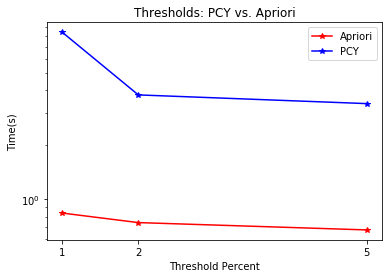

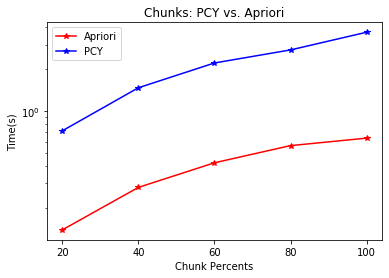

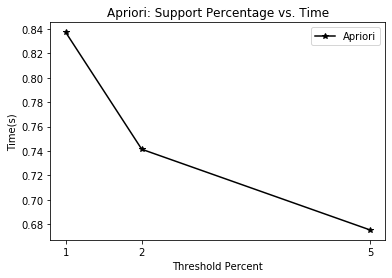

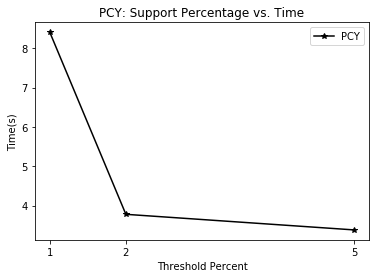

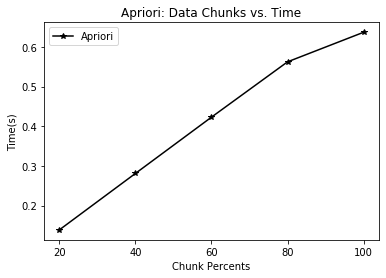

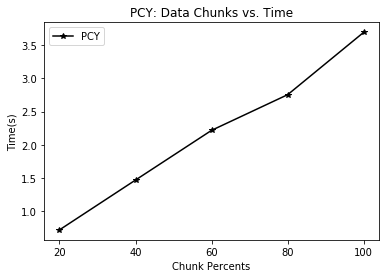

In [ ]:
from Apriori import aprioriFunction
from Apriori_pcy import pcyFunction
import numpy as np
import time
import matplotlib.pyplot as pl

fileNames = ['retail.dat']#,'Netflix.data']
thresholds = [0.01,0.02,0.05]
chunkSizes = [0.2,0.4,0.6,0.8,1]
timeListThreshold = []
timeListChunk = []

for fileName in fileNames:
    for threshold in thresholds:
        startTime = time.time()
        aprioriFunction(fileName, threshold)
        finishTime = time.time() - startTime
        print("--- %s --- %i%% --- %s seconds ---" % ("Apriori",threshold*100,finishTime))

        startTime = time.time()
        pcyFunction(fileName, threshold)
        finishTimePCY = time.time() - startTime
        print("--- %s --- %i%% --- %s seconds ---" % ("ApriPCY",threshold*100,finishTimePCY))  
        timeListThreshold.append([threshold*100, finishTime, finishTimePCY])  
    for size in chunkSizes:
        startTime = time.time()
        aprioriFunction(fileName, 0.02, size)
        finishTime = time.time() - startTime
        print("--- %s --- %i%% --- %s seconds ---" % ("Apriori",size*100,finishTime))

        startTime = time.time()
        pcyFunction(fileName, 0.02, size)
        finishTimePCY = time.time() - startTime
        print("--- %s --- %i%% --- %s seconds ---" % ("ApriPCY",size*100,finishTimePCY))  
        timeListChunk.append([size*100, finishTime, finishTimePCY])

numpyThreshold = np.array(timeListThreshold)
numpyChunk = np.array(timeListChunk)
pl.plot(numpyThreshold[:, 0], numpyThreshold[:, 1],'-*r', label='Apriori');
pl.plot(numpyThreshold[:, 0], numpyThreshold[:, 2],'-*b', label='PCY');
pl.legend();
pl.xticks(numpyThreshold[:, 0])
pl.yscale('log')
pl.title('Thresholds: PCY vs. Apriori')
pl.xlabel('Threshold Percent')
pl.ylabel('Time(s)')
pl.show()

pl.plot(numpyChunk[:, 0], numpyChunk[:, 1],'-*r', label='Apriori');
pl.plot(numpyChunk[:, 0], numpyChunk[:, 2],'-*b', label='PCY');
pl.legend();
pl.xticks(numpyChunk[:, 0])
pl.yscale('log')
pl.title('Chunks: PCY vs. Apriori')
pl.xlabel('Chunk Percents')
pl.ylabel('Time(s)')
pl.show()

pl.plot(numpyThreshold[:, 0], numpyThreshold[:, 1],'-*k', label='Apriori');
pl.legend();
pl.xticks(numpyThreshold[:, 0])
pl.title('Apriori: Support Percentage vs. Time')
pl.xlabel('Threshold Percent')
pl.ylabel('Time(s)')
pl.show()

pl.plot(numpyThreshold[:, 0], numpyThreshold[:, 2],'-*k', label='PCY');
pl.legend();
pl.xticks(numpyThreshold[:, 0])
pl.title('PCY: Support Percentage vs. Time')
pl.xlabel('Threshold Percent')
pl.ylabel('Time(s)')
pl.show()

pl.plot(numpyChunk[:, 0], numpyChunk[:, 1],'-*k', label='Apriori');
pl.legend();
pl.xticks(numpyChunk[:, 0])
pl.title('Apriori: Data Chunks vs. Time')
pl.xlabel('Chunk Percents')
pl.ylabel('Time(s)')
pl.show()

pl.plot(numpyChunk[:, 0], numpyChunk[:, 2],'-*k', label='PCY');
pl.legend();
pl.xticks(numpyChunk[:, 0])
pl.title('PCY: Data Chunks vs. Time')
pl.xlabel('Chunk Percents')
pl.ylabel('Time(s)')
pl.show()

--- rand --- 1% --- 0.6317160129547119 seconds ---
167641
--- SON --- 1% --- 0.7934420108795166 seconds ---
--- rand --- 2% --- 0.5656108856201172 seconds ---
123915
--- SON --- 2% --- 0.6187858581542969 seconds ---
--- rand --- 5% --- 0.4270327091217041 seconds ---
84352
--- SON --- 5% --- 0.5050883293151855 seconds ---
--- Rand --- 20% --- 0.14539217948913574 seconds ---
123915
--- SON --- 20% --- 0.5811722278594971 seconds ---
--- Rand --- 40% --- 0.34279942512512207 seconds ---
123915
--- SON --- 40% --- 0.5942652225494385 seconds ---
--- Rand --- 60% --- 0.4143838882446289 seconds ---
123915
--- SON --- 60% --- 0.564112663269043 seconds ---
--- Rand --- 80% --- 0.627253532409668 seconds ---
123915
--- SON --- 80% --- 0.5869393348693848 seconds ---
--- Rand --- 100% --- 0.7585539817810059 seconds ---
123915
--- SON --- 100% --- 0.590688943862915 seconds ---


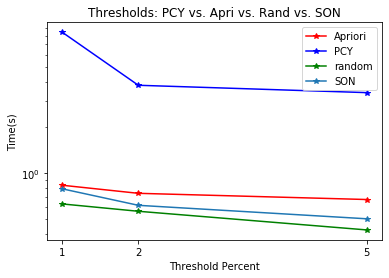

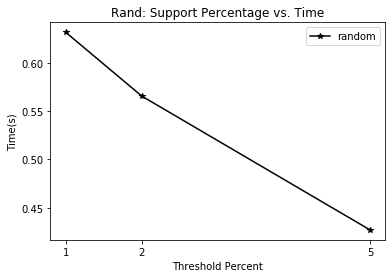

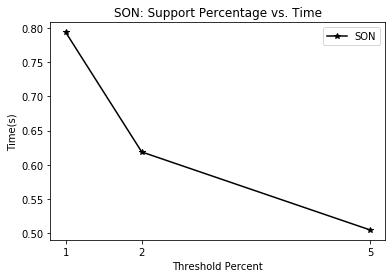

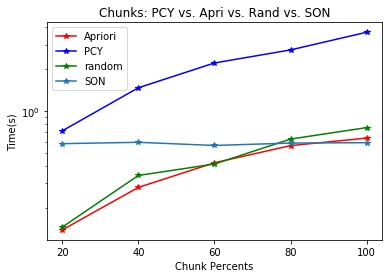

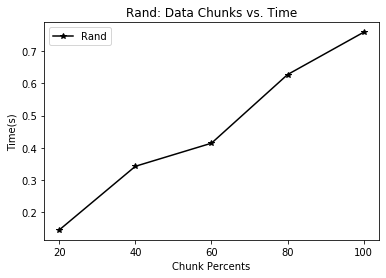

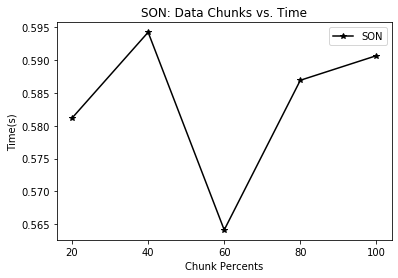

In [ ]:
import randomAndSON
randSON = []
chunkRandSON = []
for threshold in thresholds:
    startTime = time.time()
    randomAndSON.randomSample('retail.dat', threshold, 0.7)
    finishTime = time.time() - startTime
    print("--- %s --- %i%% --- %s seconds ---" % ("rand",threshold*100,finishTime))

    startTime = time.time()
    randomAndSON.algorithmSON('retail.dat', threshold, 0.2)
    finishTimePCY = time.time() - startTime
    print("--- %s --- %i%% --- %s seconds ---" % ("SON",threshold*100,finishTimePCY))
    randSON.append([threshold*100, finishTime, finishTimePCY])
        
for size in chunkSizes:
    startTime = time.time()
    randomAndSON.randomSample('retail.dat', 0.02, size)
    finishTime = time.time() - startTime
    print("--- %s --- %i%% --- %s seconds ---" % ("Rand",size*100,finishTime))

    startTime = time.time()
    randomAndSON.algorithmSON('retail.dat', 0.02, size)
    finishTimePCY = time.time() - startTime
    print("--- %s --- %i%% --- %s seconds ---" % ("SON",size*100,finishTimePCY))  
    chunkRandSON.append([size*100, finishTime, finishTimePCY])
    
npThresExt = np.array(randSON)
npChunkExt = np.array(chunkRandSON)
pl.plot(numpyThreshold[:, 0], numpyThreshold[:, 1],'-*r', label='Apriori');
pl.plot(numpyThreshold[:, 0], numpyThreshold[:, 2],'-*b', label='PCY');
pl.plot(npThresExt[:, 0], npThresExt[:, 1],'-*g', label='random');
pl.plot(npThresExt[:, 0], npThresExt[:, 2],'-*', label='SON');
pl.legend();
pl.xticks(numpyThreshold[:, 0])
pl.yscale('log')
pl.title('Thresholds: PCY vs. Apri vs. Rand vs. SON')
pl.xlabel('Threshold Percent')
pl.ylabel('Time(s)')
pl.show()

pl.plot(npThresExt[:, 0], npThresExt[:, 1],'-*k', label='random');
pl.legend();
pl.xticks(numpyThreshold[:, 0])
pl.title('Rand: Support Percentage vs. Time')
pl.xlabel('Threshold Percent')
pl.ylabel('Time(s)')
pl.show()

pl.plot(npThresExt[:, 0], npThresExt[:, 2],'-*k', label='SON');
pl.legend();
pl.xticks(numpyThreshold[:, 0])
pl.title('SON: Support Percentage vs. Time')
pl.xlabel('Threshold Percent')
pl.ylabel('Time(s)')
pl.show()

pl.plot(numpyChunk[:, 0], numpyChunk[:, 1],'-*r', label='Apriori');
pl.plot(numpyChunk[:, 0], numpyChunk[:, 2],'-*b', label='PCY');
pl.plot(npChunkExt[:, 0], npChunkExt[:, 1],'-*g', label='random');
pl.plot(npChunkExt[:, 0], npChunkExt[:, 2],'-*', label='SON');
pl.legend();
pl.xticks(numpyChunk[:, 0])
pl.yscale('log')
pl.title('Chunks: PCY vs. Apri vs. Rand vs. SON')
pl.xlabel('Chunk Percents')
pl.ylabel('Time(s)')
pl.show()

pl.plot(npChunkExt[:, 0], npChunkExt[:, 1],'-*k', label='Rand');
pl.legend();
pl.xticks(npChunkExt[:, 0])
pl.title('Rand: Data Chunks vs. Time')
pl.xlabel('Chunk Percents')
pl.ylabel('Time(s)')
pl.show()

pl.plot(npChunkExt[:, 0], npChunkExt[:, 2],'-*k', label='SON');
pl.legend();
pl.xticks(npChunkExt[:, 0])
pl.title('SON: Data Chunks vs. Time')
pl.xlabel('Chunk Percents')
pl.ylabel('Time(s)')
pl.show()

In [ ]:
from collections import defaultdict
from itertools import combinations
import math

def setHash(num1, num2):
  return (num1 ^ num2) % 1055

def singlesSet(fileName, chunkSize):
    singlesList = defaultdict(int)
    baskets = []
    buckets = {}
    counterLine = 0
    with open(fileName) as file:
        for line in file:
            basketList = list(map(int, line.split()))
            baskets.append(basketList)
            for num in basketList:
                singlesList[num] += 1
            pairs = list(combinations(basketList, 2))
            for pair in pairs:
                index = setHash(pair[0], pair[1])
                buckets[index] = 1 if index not in buckets else buckets[index]+1
            counterLine += 1
            if counterLine == chunkSize:
                break
    return singlesList, baskets, buckets
    

def pcyFunction(fileName, minSupp, chunkPercent = 1):
    totalLine = math.floor(sum([1 for i in open(fileName,"r").readlines() if i.strip()])*chunkPercent)
    singlesList, baskets, buckets = singlesSet(fileName, totalLine)
    
    #Check for higher threshold 
    frequentSingles = defaultdict(int)
    for key, value in singlesList.items():
        if (value/totalLine >= minSupp):
            frequentSingles[key] = value
    
    '''--------------+-----PASS 2-----+--------------'''
    bit_map = []
    #Convert hash list to binary list
    for key, value in buckets.items():
        if value/totalLine < minSupp:
            bit_map.insert(key, 0)
        else:
            bit_map.insert(key, 1)
    
    #Check for higher threshold 
    frequent_pairs  = list( combinations(frequentSingles.keys(), 2) )
    for pair in frequent_pairs:
        hash_value = setHash(pair[0], pair[1])
        if (bit_map[hash_value] )!= 1:
            frequent_pairs.remove(pair)
            
            
    frequentDict = defaultdict(int)
    for basket in baskets:
        for i in basket:
            if i in frequentSingles:
                for j in basket[basket.index(i) + 1:]:
                    if j in frequentSingles and (i, j) in frequent_pairs:
                        frequentDict[i,j] +=1
                    
    frequentPairs = defaultdict(int)
    for key, value in frequentDict.items():
        if (value/totalLine >= minSupp):
            frequentPairs[key] = value
            
    print(sum(frequentPairs.values()))
    
#     for key, value in sorted(frequentPairs.items(), key=lambda x: x[1], reverse=True): 
#         print ("%s : % d"%(key, value)) 
    return frequentPairs
    
import time
start_time = time.time()
pcyFunction('/content/drive/My Drive/netflix.data', 0.3)
print("--- %s seconds ---" % (time.time() - start_time))